The Lorenz system is a system of three ODEs having chaotic solutions (butterfly effect).

$$\begin{split} \dot{x} & = \sigma (y - x) \\
\dot{y} & = x (\rho - z) - y \\
\dot{z} & = xy - \beta z
\end{split}$$

Reference: https://en.wikipedia.org/wiki/Lorenz_system

In [1]:
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
with open('3-d_attractor.pkl', 'rb') as file:
    lorenz = pickle.load(file)

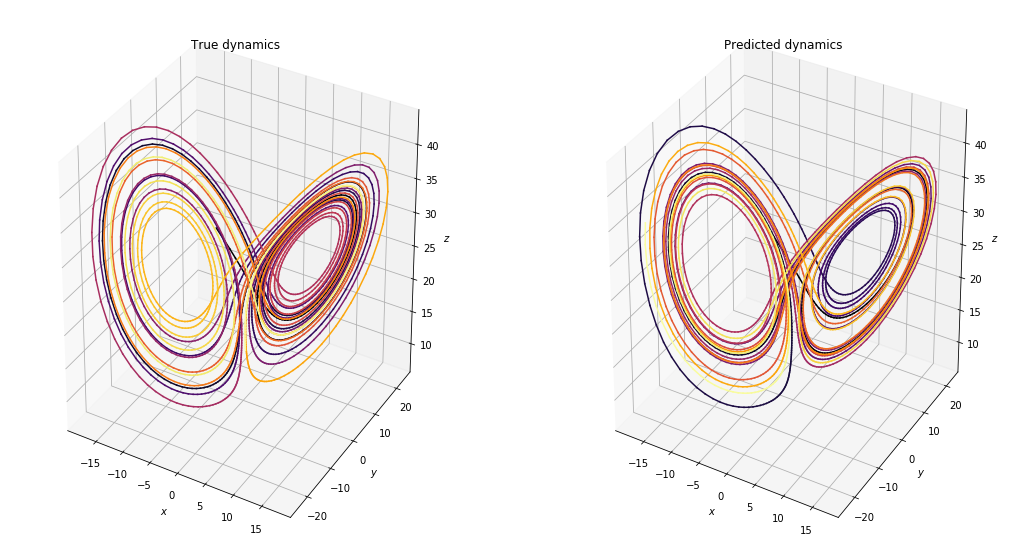

In [3]:
# plot phase portrait in 3-D projection

x = lorenz['data'][0,:,0]
y = lorenz['data'][0,:,1]
z = lorenz['data'][0,:,2]

fig = plt.figure(figsize=(18,10)) # twice as wide as it is tall
ax = fig.add_subplot(1, 2, 1, projection='3d')

for i in range(0, len(x)):
    ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=plt.cm.inferno(int(255*i/len(x))))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('True dynamics', fontsize = 12, loc='center', pad=2.0)

x = lorenz['pred'][:,0]
y = lorenz['pred'][:,1]
z = lorenz['pred'][:,2]

ax = fig.add_subplot(1, 2, 2, projection='3d')
for i in range(0, len(x)):
    ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=plt.cm.inferno(int(255*i/len(x))))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Predicted dynamics', fontsize = 12, loc='center', pad=2.0)
plt.show()

The trajectory of our solution in the phase space: the color goes from dark to bright as time progresses.

![colormap](https://matplotlib.org/_images/sphx_glr_colormaps_001.png)

**compare this to wikipedia**

A sample trajectory through phase space is plotted near a Lorenz attractor with σ = 10, ρ = 28, β = 8/3. The color of the solution fades from black to blue as time progresses, and the black dot shows a particle moving along the solution in time. Initial conditions: x(0) = 0, y(0) = 2, z(0) = 20. 0 < t < 35. The 3-dimensional trajectory {x(t), y(t), z(t)} is shown from different angles to demonstrate its structure.
![lorenz](https://upload.wikimedia.org/wikipedia/commons/1/13/A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif)

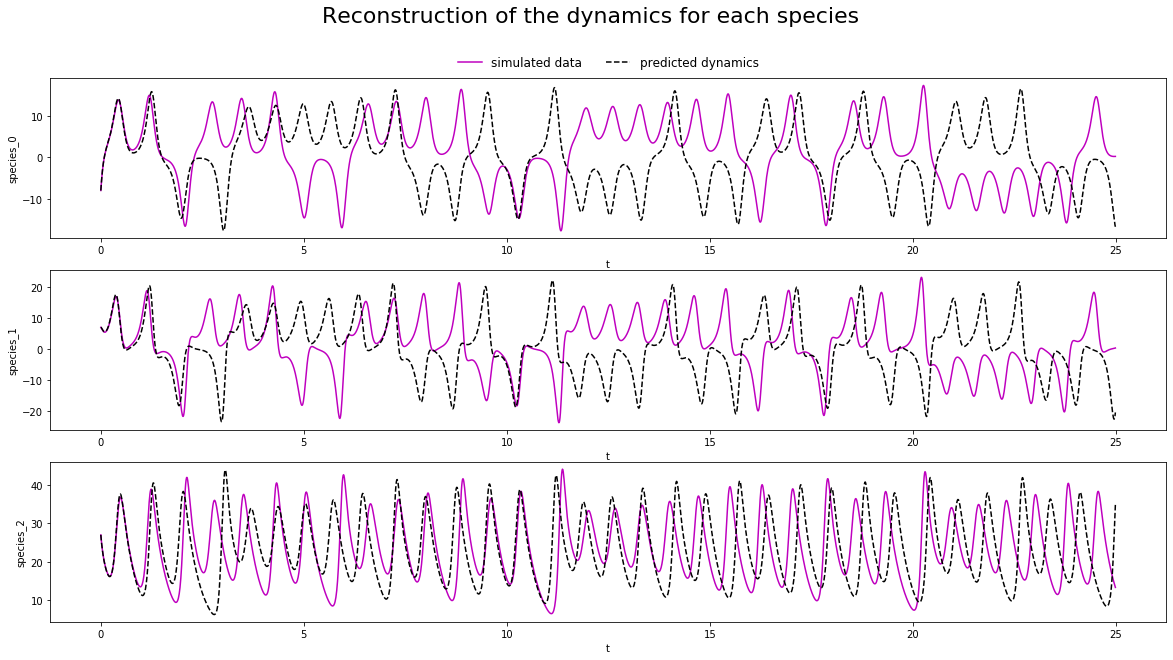

In [4]:
#time_points = lorenz['t']

t0 = 0 # start time
T = 25 # end time
h = 0.01 # step size

# generate data
time_points = np.arange(t0, T, h)

plt.figure(figsize=(20, 10))
plt.suptitle("Reconstruction of the dynamics for each species", fontsize=22)

# plot the dynamics with time
for species in range(3):
    plt.subplot(3, 1, species + 1)
    plt.plot(time_points, lorenz['data'][0,:,species], 'm-', label='simulated data')
    plt.plot(time_points, lorenz['pred'][:,species], 'k--', label='predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('species_' + str(species))

plt.legend(loc='center', bbox_to_anchor=(0.5, 3.5), ncol=2, fontsize=12, frameon=False)
plt.show()

As we can see, the predicted dynamics still captures the form of the attractor, but small differences between the exact and learnt model grow exponentially due to the chaotic nature. This is why the errors are small only for short period T. However, the bistability of the attractor is correctly predicted.